# Number Plate Detection and Extraction Using EasyOCR and OpenCV
- In this project, we utilize EasyOCR and OpenCV to detect and extract the number plate from a given image. The process involves reading the image, processing it to identify the number plate region, and then extracting the text using Optical Character Recognition (OCR). EasyOCR is an efficient tool for text detection, and OpenCV helps in image manipulation and visualization. The goal is to automate number plate recognition, which can be useful for applications such as vehicle tracking and security systems.

# Summary of Dependencies
- Easyocr: OCR tool for detecting text in images (especially useful for extracting number plates).
- Opencv-python: Essential for image processing tasks such as loading, modifying, and displaying images.
- Opencv-python-headless: A version of OpenCV for headless environments, useful when working in cloud servers or containers where graphical output is not required.
- Numpy: Used for handling arrays and matrices efficiently, especially for manipulating image data.
- Matplotlib: Used for displaying images and generating visualizations in Python.
- This set of dependencies provides the necessary tools for image processing, text recognition, and visualization, making it a robust environment for projects involving image manipulation and recognition.

In [1]:
#pip install easyocr
#pip install opencv-python
#pip install opencv-python-headless
#pip install numpy
#pip install matplotlib
#pip install easyocr opencv-python numpy matplotlib
#python --version
#pip --version

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


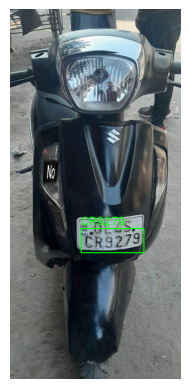

Detected Number Plate: CR9279


In [2]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # This initializes the reader for English language OCR

def detect_and_extract_number_plate(image_path):
    # Step 2: Read the input image using OpenCV
    image = cv2.imread(image_path)

    # Step 3: Convert the image to grayscale for text detection (optional but can improve performance)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 4: Use EasyOCR to detect the number plate in the image
    result = reader.readtext(gray_image)

    # Step 5: Extract the recognized number plate text
    number_plate = None
    for detection in result:
        # The detection contains: [(top-left corner, top-right corner, bottom-right corner, bottom-left corner), text]
        points = detection[0]  # This is a list of points forming the bounding box
        text = detection[1]  # This is the text (number plate text)
        
        # We assume that the detected text contains numbers for a number plate
        if any(char.isdigit() for char in text):
            number_plate = text
            
            # Draw a rectangle around the detected number plate for visualization (optional)
            points = np.array(points, dtype=np.int32)
            points = points.reshape((-1, 1, 2))
            cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)

            # Add the text to the image
            cv2.putText(image, text, (points[0][0][0], points[0][0][1] - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            break  # Since we are assuming a single number plate is present in the image

    # Step 6: Display the image with the detected number plate
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    return number_plate  # Return the detected number plate

# Example usage:
image_path = 'data8.png'  # Replace with your image path
number_plate = detect_and_extract_number_plate(image_path)
print(f"Detected Number Plate: {number_plate}")


# Conclusion
- In this project, we have successfully implemented a solution to detect and extract the number plate from a given image using EasyOCR and OpenCV. The workflow involved several key steps:

- Image Preprocessing: We used OpenCV to load the image and convert it to grayscale to make it suitable for Optical Character Recognition (OCR).
- Text Detection: Using EasyOCR, we detected and recognized the text within the image, specifically looking for a string that contains digits, which we assumed represents a number plate.
Bounding Box Visualization: After detecting the number plate, we highlighted it by drawing a bounding box around the detected region and overlaying the recognized text on the image for better visualization.

**Final Output:**
- We displayed the processed image using Matplotlib and returned the detected number plate text.
The approach utilized EasyOCR for text recognition and OpenCV for image processing, which together provide a powerful and efficient solution for number plate detection tasks. This method can be expanded for more advanced scenarios, such as replacing detected number plates with logos or handling images with multiple plates.